# Blog Generator

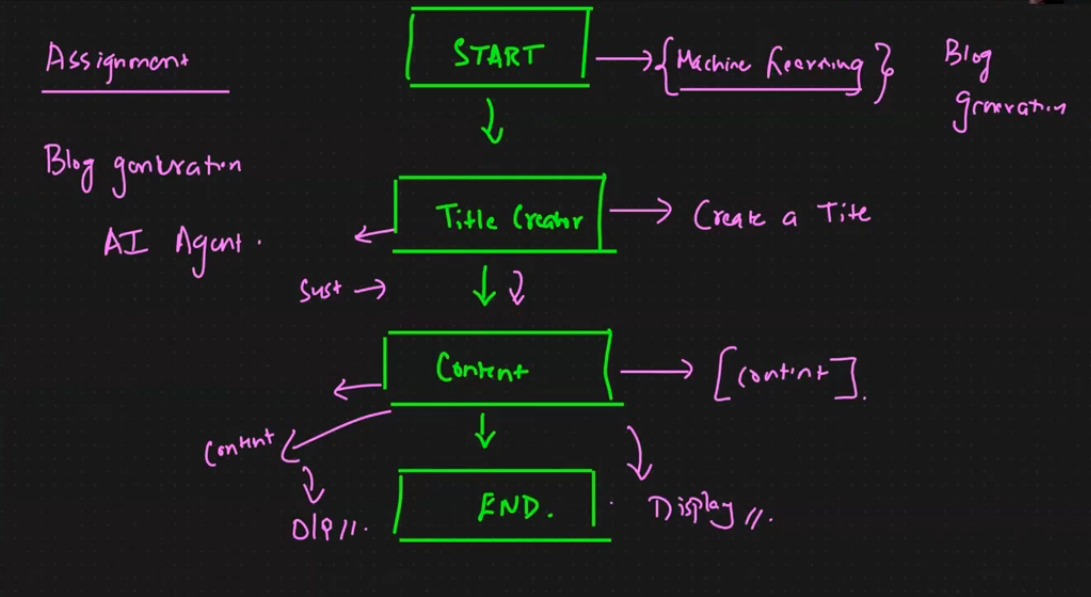

In [32]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [33]:
from langchain_groq import ChatGroq

llm=ChatGroq(model="llama3-70b-8192")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x00000274DC90C770>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000274DC862180>, model_name='llama3-70b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [34]:
from typing_extensions import TypedDict
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage, AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

class MessagesState(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

In [35]:
def generate_titles(state: MessagesState) -> MessagesState:
    topic = state["messages"][-1].content  # Get topic from last message

    # Prompt the LLM to generate multiple titles
    response = llm.invoke(f"Generate 10 titles on the topic: {topic}")
    titles = response.content.split("\n")

    # Store titles as AI messages
    title_messages = [AIMessage(content=title.strip()) for title in titles if title.strip()]
    
    return {"messages": title_messages}

import random

# Content Generator
def generate_content(state: MessagesState) -> MessagesState:
    selected_title = random.choice(state["messages"]).content  # Randomly pick a title

    # Generate blog content based on selected title
    response = llm.invoke(f"Write a detailed content on the subtopic: {selected_title}")
    content = response.content

    return {"messages": [AIMessage(content=f"Title: {selected_title}\n\n{content}")]}

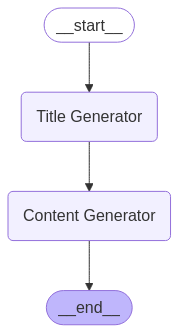

In [36]:
from langgraph.graph import START, StateGraph, END

builder=StateGraph(MessagesState)

builder.add_node("Title Generator",generate_titles)
builder.add_node("Content Generator",generate_content)

builder.add_edge(START,"Title Generator")
builder.add_edge("Title Generator","Content Generator")
builder.add_edge("Content Generator",END)

graph=builder.compile()
graph

In [37]:
messages = [HumanMessage(content="Virat kohli")]
messages = graph.invoke({"messages": messages})

for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Virat kohli
================================== Ai Message ==================================

Here are 10 title options on the topic of Virat Kohli:
================================== Ai Message ==================================

1. **The King of Cricket: The Virat Kohli Story**
================================== Ai Message ==================================

2. **Kohli: The Unstoppable Force in Indian Cricket**
================================== Ai Message ==================================

3. **From Delhi to Dominance: The Rise of Virat Kohli**
================================== Ai Message ==================================

4. **Virat Kohli: The Making of a Cricketing Legend**
================================== Ai Message ==================================

5. **The Kohli Effect: How Virat Kohli Changed Indian Cricket Forever**
================================== Ai Message ===========================